In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def find_staggering(drop, patience = 5):
    '''
    if there is no better drop in the next {patience} window, compared with previous best
    call it staggering and report display_steps used to reach staggering
    if staggering not found, return None
    '''
    for i, val in enumerate(drop):
        if i < 1:
            continue
        if i + patience > len(drop):
            break
        best_till_now = max(drop[:i+1])
        window = drop[i:i+1+patience]
        window_best = max(window)
        window_improvement = window_best -best_till_now
        if window_improvement <=0:
            return i
            break
    # if no staggering
    return None

In [3]:
def staggering_plot(skip=0):
    i = skip
    plt.plot(epochs[i:], mse_valid[i:], 'r.', label='valid')
    plt.plot(epochs[i:], mse_train[i:], 'b.', label='batch')
    plt.axvline(x=staggering_epoch, label='staggering epoch')
    plt.axvline(x=window_righter, color='grey', label='window boundry')
    plt.title('{}\nlearning staggered at epoch {}'.format(tag,staggering_epoch))
    plt.xlabel('epochs')
    plt.ylabel('MSE1_OMEGA')
    plt.legend()
    plt.show()

In [4]:
def no_staggering_plot(skip=0):
    i = skip
    plt.plot(epochs[i:], mse_valid[i:], 'r.', label='valid')
    plt.plot(epochs[i:], mse_train[i:], 'b.', label='batch')
    plt.title('{}\nlearning not staggered'.format(tag))
    plt.xlabel('epochs')
    plt.ylabel('MSE1_OMEGA')
    plt.legend()
    plt.show()

In [5]:
%pwd

'/mnt/lfs2/rui/scImpute_results/180219_CountLogFormat/pbmc_g949/translate_7L'

In [6]:
%ls slurm* *log* nohup*

ls: cannot access nohup*: No such file or directory
data_log_transformation.py*  result_analysis.log  slurm-331444.out


In [7]:
tag = 'TransLate_7L'

In [8]:
with open('slurm-331444.out') as f:
    lines = f.readlines()

lines

['n104.fortytwo.ibest.uidaho.edu\n',
 'Mon Feb 19 19:59:05 PST 2018\n',
 'GPU 0: GeForce GTX 1080 Ti (UUID: GPU-e7ba4d16-ed73-5cc2-dea0-aeacaa23f8d8)\n',
 '*--training NN--*\n',
 'Usage: python -u <translate.py> <params.py>\n',
 '\n',
 'file1: ../data/gtex_v7.nz40.count.log.hd5\n',
 'name1: GTEx.G949.CountLog\n',
 'data_frame1_orientation: gene_row\n',
 '\n',
 'file2: ../data/gtex_v7.nz40.count.log.hd5\n',
 'name2: GTEx.G949.CountLog\n',
 'data_frame2_orientation: gene_row\n',
 '\n',
 'Parameters:\n',
 'mode: pre-training\n',
 'mse_mode: mse_omega\n',
 'data_transformation: as_is\n',
 'stage: step1\n',
 'init: rand_init\n',
 'test_mode: 0\n',
 '7L\n',
 'n_hidden1: 400\n',
 'n_hidden2: 300\n',
 'n_hidden3: 200\n',
 'learning_rate: 0.0003\n',
 'reg_coef: 0.0\n',
 'batch_size: 256\n',
 'data split: [0.7/0.15/0.15]\n',
 'pIn: 0.8\n',
 'pHidden: 0.5\n',
 'max_training_epochs: 2000\n',
 'display_step 50\n',
 'snapshot_step 500\n',
 '\n',
 'python version: 3.5.2 (default, Jan 24 2018, 15:13:3

In [9]:
epochs = [line for line in lines if re.search('^epoch', line)]
p_epoch = re.compile("epoch:  (\d+) ;")
epochs = [p_epoch.findall(epoch)[0] for epoch in epochs]

epochs = epochs[41:]  # translate has step1 and step2 mixed in nohup.out
epochs.insert(0, 0)

epochs = np.array(epochs).astype(int)
print(epochs)
print(len(epochs))

[   0    1   50  100  150  200  250  300  350  400  450  500  550  600
  650  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300
 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000]
42


In [10]:
mses = [line for line in lines if re.search('mse_omage_valid', line)]
remove_change_line = lambda x: re.sub("\n", '', x)
formatting_colon = lambda x: re.sub("=", ':', x)

mses = list(map(remove_change_line, mses))
mses = list(map(formatting_colon, mses))

mses = mses[42:]
print(len(mses))
for i, val in enumerate(mses):
    print(i, val)

42
0 mse_omega_train: 0.993 mse_omage_valid: 0.995
1 mse_omega_batch:0.6036409735679626;  mse_omage_valid: 0.6051915287971497
2 mse_omega_batch:0.02311304584145546;  mse_omage_valid: 0.023122096434235573
3 mse_omega_batch:0.01882738061249256;  mse_omage_valid: 0.01885278895497322
4 mse_omega_batch:0.011171565391123295;  mse_omage_valid: 0.011143103241920471
5 mse_omega_batch:0.0100108552724123;  mse_omage_valid: 0.009649662300944328
6 mse_omega_batch:0.008707904256880283;  mse_omage_valid: 0.008735585026443005
7 mse_omega_batch:0.007348397746682167;  mse_omage_valid: 0.0074078720062971115
8 mse_omega_batch:0.006309405900537968;  mse_omage_valid: 0.006346714682877064
9 mse_omega_batch:0.005919249262660742;  mse_omage_valid: 0.006004926282912493
10 mse_omega_batch:0.005710385739803314;  mse_omage_valid: 0.005572861060500145
11 mse_omega_batch:0.004985676612704992;  mse_omage_valid: 0.004995056893676519
12 mse_omega_batch:0.004247739445418119;  mse_omage_valid: 0.004319057799875736
13 mse

In [11]:
p_mses = re.compile('([\d\.]+)')
mse_train = [p_mses.findall(line)[0] for line in mses]
mse_valid = [p_mses.findall(line)[1] for line in mses]
mse_valid = np.array(mse_valid).astype(float)
mse_train = np.array(mse_train).astype(float)

In [12]:
print(epochs.shape)
print(mse_train.shape)
print(mse_valid.shape)

(42,)
(42,)
(42,)


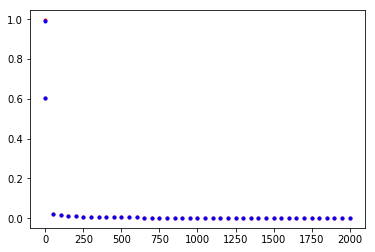

In [13]:
i=0
plt.plot(epochs[i:], mse_valid[i:], 'r.', epochs[i:], mse_train[i:], 'b.')
plt.show()

In [14]:
#drop 99%
max_drop = max(mse_valid) - min(mse_valid)
max_drop

0.9930683258036151

In [15]:
drop = (max(mse_valid) - mse_valid)/max_drop
stable_stages = epochs[drop > 0.99]
epoch_drop99 = stable_stages[0]
epoch_drop99

150

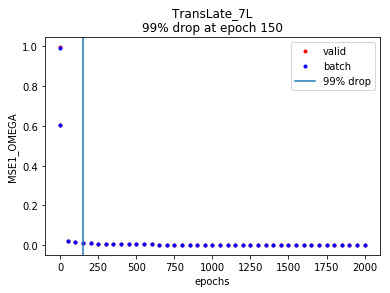

In [16]:
i=0
plt.plot(epochs[i:], mse_valid[i:], 'r.', label='valid')
plt.plot(epochs[i:], mse_train[i:], 'b.', label='batch')
plt.axvline(x=epoch_drop99, label='99% drop')
plt.title('{}\n99% drop at epoch {}'.format(tag,epoch_drop99))
plt.xlabel('epochs')
plt.ylabel('MSE1_OMEGA')
plt.legend()
plt.show()

In [17]:
# staggering (no new lowest appear in 3 snapshots)

In [18]:
patience = 5
staggering_display_step = find_staggering(drop, patience=patience)

In [21]:
skip=20

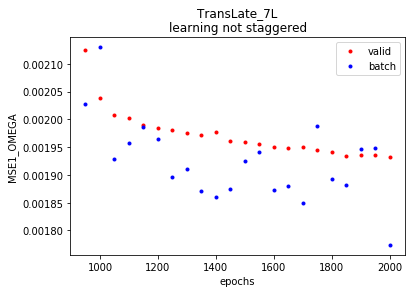

In [22]:
if staggering_display_step != None:
    staggering_epoch = epochs[staggering_display_step]
    window_righter = epochs[staggering_display_step+patience]
    staggering_plot(skip=skip)
else: 
    no_staggering_plot(skip=skip)
